In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)


# Normalisation (entre 0 et 1)
X = X / 255.0

# Division train/test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print("Taille des données d'entraînement :", X_train.shape)
print("Taille des données de test :", X_test.shape)


Taille des données d'entraînement : (60000, 784)
Taille des données de test : (10000, 784)


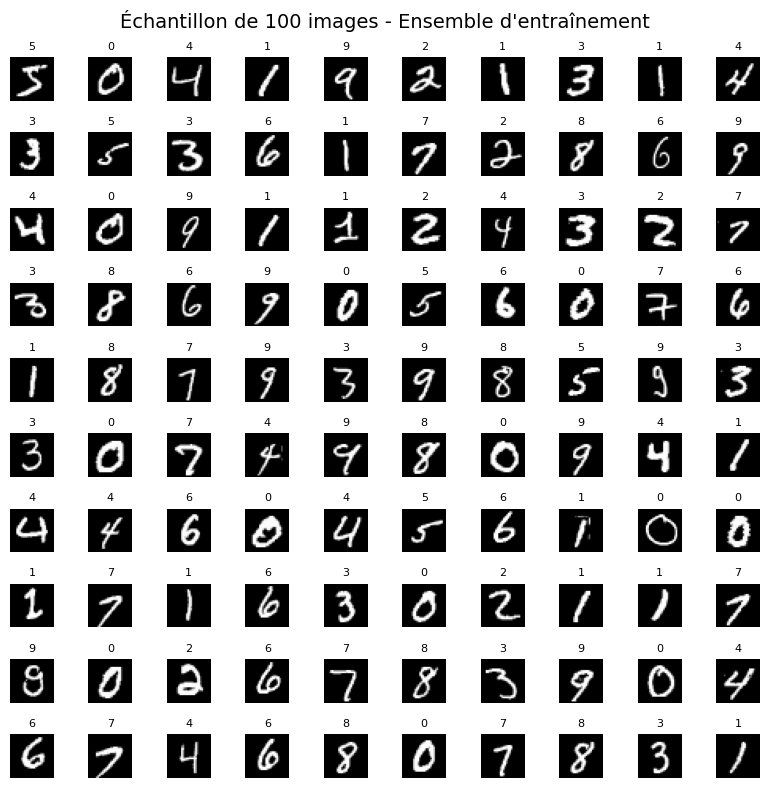

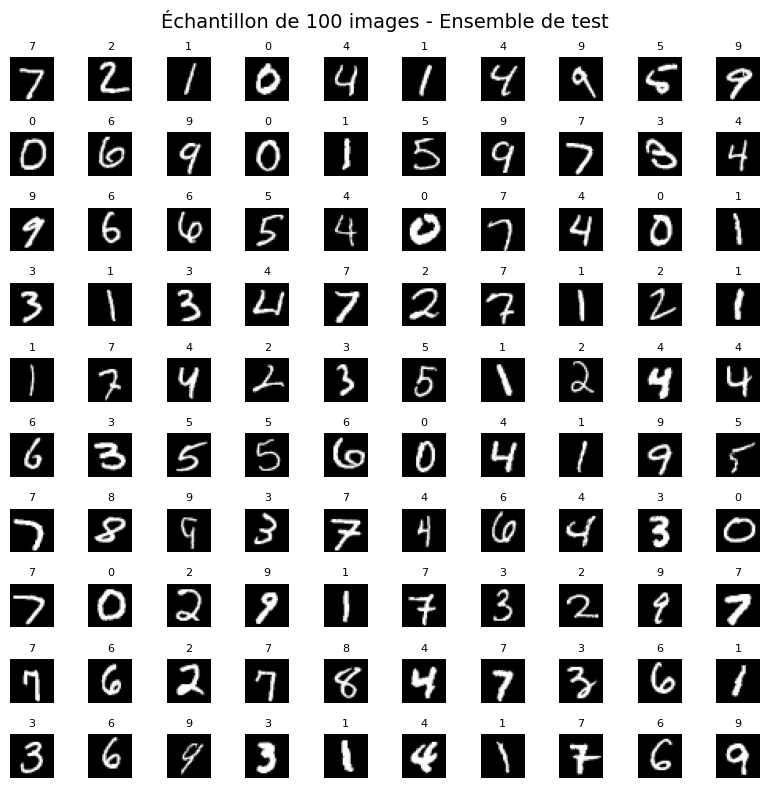

In [9]:

import matplotlib.pyplot as plt

# ===== Jeu d'entraînement =====
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"{y_train[i]}", fontsize=8)
    ax.axis('off')

plt.suptitle("Échantillon de 100 images - Ensemble d'entraînement", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("echantillon_train.png", dpi=300)
plt.show()


# ===== Jeu de test =====
# Réinitialiser les index pour éviter les erreurs de clé
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Jeu de test : affichage de 100 images
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"{y_test[i]}", fontsize=8)
    ax.axis('off')

plt.suptitle("Échantillon de 100 images - Ensemble de test", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("echantillon_test.png", dpi=300)
plt.show()



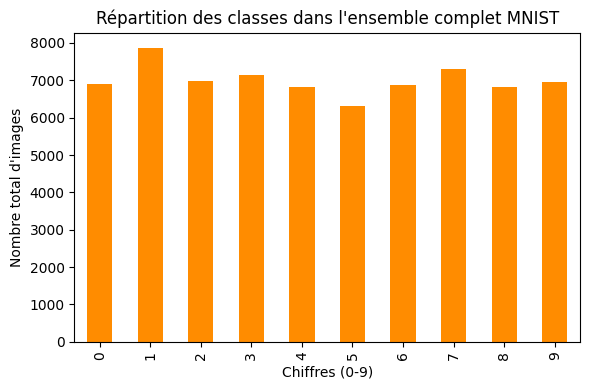

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

y_all = np.concatenate([y_train, y_test])  # on regroupe les labels train + test

plt.figure(figsize=(6,4))
pd.Series(y_all).value_counts().sort_index().plot(kind='bar', color='darkorange')
plt.title("Répartition des classes dans l'ensemble complet MNIST")
plt.xlabel("Chiffres (0-9)")
plt.ylabel("Nombre total d'images")
plt.tight_layout()
plt.savefig("distribution_classes_total.png", dpi=300)
plt.show()


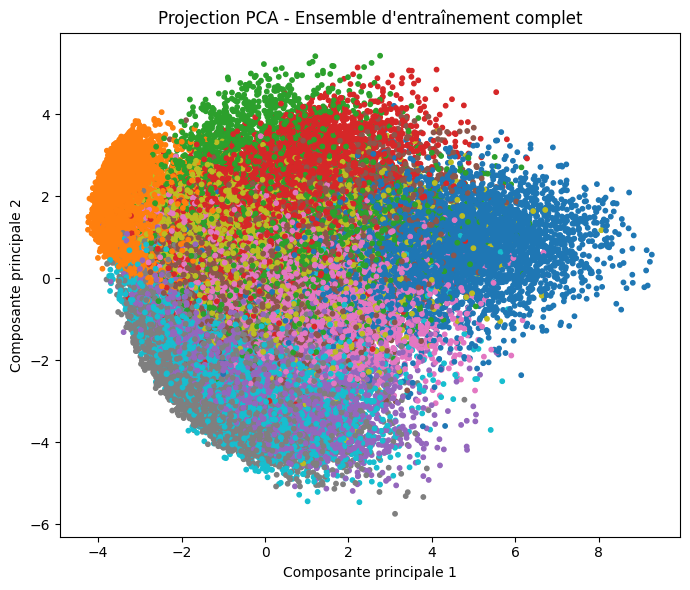

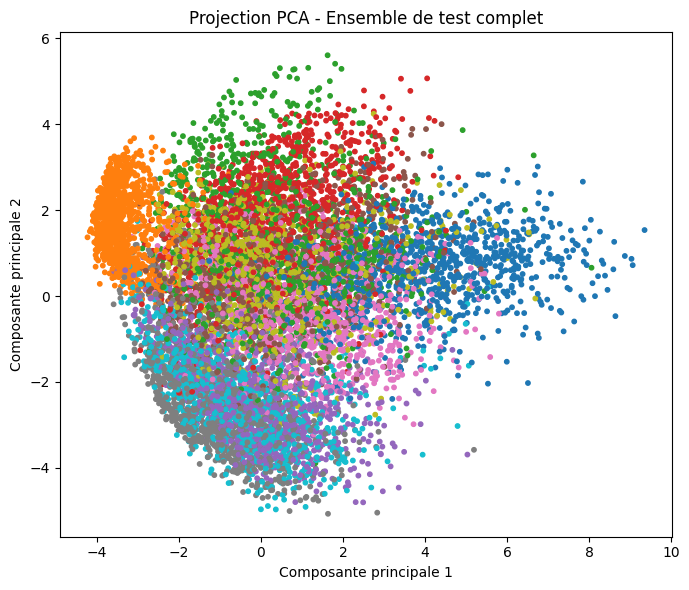

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ===== PCA sur l'ensemble complet d'entraînement =====
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(7,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap='tab10', s=10)
plt.title("Projection PCA - Ensemble d'entraînement complet")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.tight_layout()
plt.savefig("pca_train_full.png", dpi=300)
plt.show()

# ===== PCA sur l'ensemble complet de test =====
X_test_pca = pca.transform(X_test)  # on applique la PCA apprise sur le train
plt.figure(figsize=(7,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap='tab10', s=10)
plt.title("Projection PCA - Ensemble de test complet")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.tight_layout()
plt.savefig("pca_test_full.png", dpi=300)
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial',verbose=1)
log_reg.fit(X_train, y_train)

train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)

print(f"Exactitude sur train : {train_acc:.4f}")
print(f"Exactitude sur test  : {test_acc:.4f}")


c:\Users\Dell Latitude 3420\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exactitude sur train : 0.9384
Exactitude sur test  : 0.9259


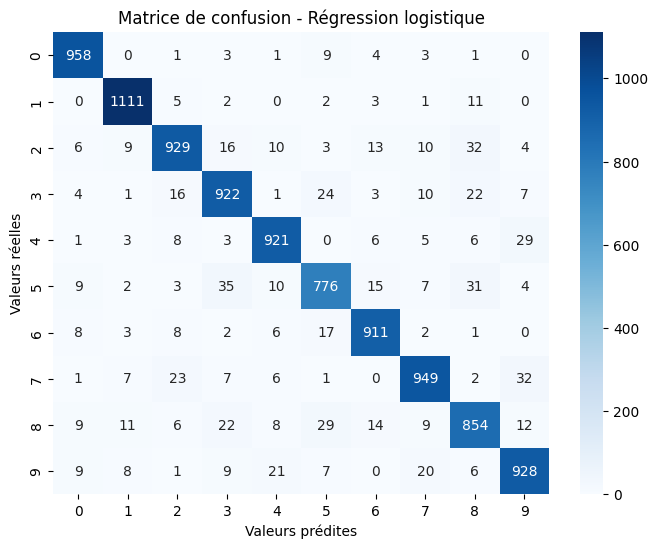

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression logistique")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

print(classification_report(y_test, y_pred))


In [24]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X_train, y_train, cv=kf)

print("Scores de validation croisée :", scores)
print("Moyenne :", scores.mean())


c:\Users\Dell Latitude 3420\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dell Latitude 3420\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dell Latitude 3420\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\User

Scores de validation croisée : [0.92233333 0.9215     0.9195     0.91525    0.91858333]
Moyenne : 0.9194333333333333


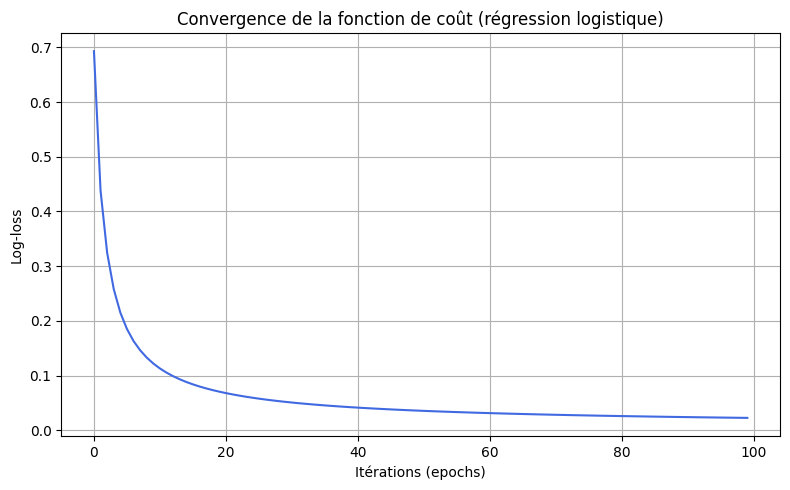

In [26]:
# ============================================================
# COURBE D'OPTIMISATION - DESCENTE DE GRADIENT (SIGMOÏDE)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Pour simplifier la démonstration, on prend un sous-ensemble de MNIST (chiffres 0 et 1)
mask = (y_train == 0) | (y_train == 1)
X_small = X_train[mask]
y_small = y_train[mask]

# Conversion en tableau numpy (utile pour le calcul matriciel)
X_small = np.array(X_small)
y_small = np.array(y_small)

# Initialisation des paramètres
n_samples, n_features = X_small.shape
w = np.zeros(n_features)
b = 0
alpha = 0.1   # taux d'apprentissage
epochs = 100  # nombre d'itérations
losses = []

# Fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Entraînement par descente de gradient
for epoch in range(epochs):
    z = np.dot(X_small, w) + b
    y_hat = sigmoid(z)
    
    # Calcul de la log-loss
    loss = -np.mean(y_small * np.log(y_hat + 1e-8) + (1 - y_small) * np.log(1 - y_hat + 1e-8))
    losses.append(loss)
    
    # Calcul du gradient
    dw = np.dot(X_small.T, (y_hat - y_small)) / n_samples
    db = np.mean(y_hat - y_small)
    
    # Mise à jour des paramètres
    w -= alpha * dw
    b -= alpha * db

# Tracé de la courbe d'optimisation
plt.figure(figsize=(8,5))
plt.plot(range(epochs), losses, color='royalblue')
plt.title("Convergence de la fonction de coût (régression logistique)")
plt.xlabel("Itérations (epochs)")
plt.ylabel("Log-loss")
plt.grid(True)
plt.tight_layout()
plt.savefig("courbe_optimisation.png", dpi=300)
plt.show()
